In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('gold_price.csv' , index_col='Date')
data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [25]:

data['Return'] = data['USD (PM)'].pct_change() *100
data['Lagged_Return'] = data.Return.shift()
data = data.dropna()
train_data = data['2001':'2018']
test_data = data['2019':]

x_train = train_data["Lagged_Return"].to_frame()
y_train = train_data["Return"]
x_test = test_data["Lagged_Return"].to_frame()
y_test = test_data["Return"]


In [26]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [27]:
prediction = model.predict(x_test)


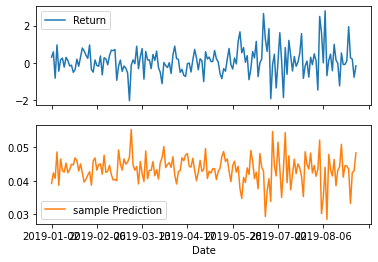

In [28]:
sample_results = y_test.to_frame()
sample_results["sample Prediction"] = model.predict(x_test)
sample_results.plot(subplots=True)
plt.show()